

# Project: Investigate  "No-show appointments" Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

## Dataset Description 
#### PatientId	Identification of a patient

#### AppointmentID	Identification of each appointment

#### Gender	"M" for Male "F" for Female.

#### ScheduledDay	The day someone called or registered the appointment.

#### AppointmentDay	The day of the actuall appointment, when they have to visit the doctor

#### Neighborhood indicates the location of the hospital.

#### Age How old is the patient.

#### Scholarship indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.1 = True , 0 = False

#### Hypertension 1 = True , 0 = False

#### Diabetes  1 = True , 0 = False

#### Alcoholism 1 = True , 0 = False

#### Handicap = the number show how many handicaps the patient had

#### SMS_received = 1 = received  0 = did not received
#### attend = it says ‘yes’ if the patient showed up to their appointment, and ‘no’ if they did not show up 

### Questions for Analysis

#### Q1- Is there a relation between missing the appointment and the Gender of the patient?
#### Q2- Is there a relation between missing the appointment and not receiving an SMS message?
#### Q3- Is there a relation between missing the appointment and diseases?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [2]:
#loading the data
df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# check our dataset shape
df.shape

(110527, 14)

####  our data set has 110527 rows and 14 columns.

In [4]:
#we will check our data type.
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [5]:
#print a summary about our dataset.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### Next, we will clean our dataset.


### Data Cleaning

 

In [6]:
#check for any duplicated rows in dataset
df.duplicated().sum()

0

### Our Dataset has no duplicated rows.

In [7]:
# we will check if we have missing values.
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### Our dataset has no missing values.

### We will check our columns data type.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
#first we We do not need the columns 'PatientId' and 'AppointmentID'in our invistigation so we will drop them. 
df.drop(['PatientId','AppointmentID'], axis=1, inplace=True)

In [10]:
#convert all the column names to lowercase
df.columns = df.columns.str.lower()

In [11]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### The data columns (ScheduledDay, AppointmentDay) type are objects,, they needed to be converted to datetime data type

In [12]:
#convert scheduleday and appointmentday to a datetime
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

In [13]:
#correct the columns with spelling mistakes and also for better understanding change 'no-show' column name to 'attend'
df.rename({'hipertension' : 'hypertension','handcap' : 'handicap','no-show':'attend'}, axis = 1, inplace = True)

In [14]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attend
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
#change 'No' to 'yes' and 'Yes' to 'no' in 'attend' column to make more sense
df['attend']=df['attend'].map({'No':'yes', 'Yes': 'no'})

In [16]:
#check edit
df.head()


,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attend
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,yes
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,yes
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,yes
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,yes
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,yes


In [17]:
#check for inncorrect values 
df.age.value_counts()


 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: age, Length: 104, dtype: int64

### The age column has  one value with (-1) and that does not make sense so we will fix them. 

In [18]:
#checking for values with negative values.
df[df['age'] < 0]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attend
99832,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,yes


In [19]:
# We should drop it
df.drop(index =99832 ,inplace = True)

In [20]:
df.age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

### The average age in our dataset is 37 years.

<a id='eda'></a>
## Exploratory Data Analysis





### First we will do a genral exploration on the dataset.

In [21]:
#first take a look at gender
df.gender.value_counts(normalize=True)

F    0.649974
M    0.350026
Name: gender, dtype: float64

### The percentage of females is greater than of males.

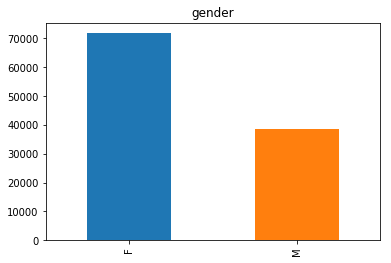

In [22]:
#Gender bar graph
df.gender.value_counts().plot(kind="bar")
plt.title("count")
plt.title("gender");

In [23]:
#take a look at scheduledday and appointmentday and the relation between them. 
df[["scheduledday","appointmentday"]].describe()

,scheduledday,appointmentday
count,110526,110526
unique,103548,27
top,2016-05-06 07:09:54,2016-06-06 00:00:00
freq,24,4691
first,2015-11-10 07:13:56,2016-04-29 00:00:00
last,2016-06-08 20:07:23,2016-06-08 00:00:00


### The period of time is starting from 2015-11-10 for scheduling dates until 08-06-2016 , and from 2016-04-29 for appointments untill 2016-06-08. which nearly less than 2 months.

Text(0.5,1,'scheduleday line chart')

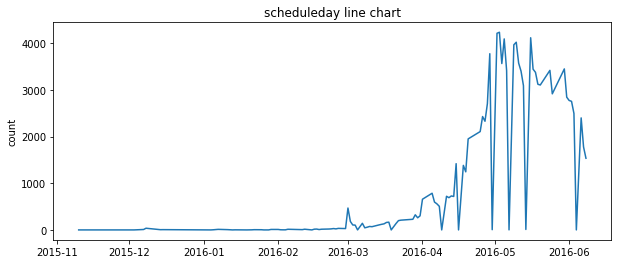

In [24]:
# line chart plot for 'ScheduledDay'
df.scheduledday.dt.date.value_counts().plot(kind="line",figsize=(10,4));
plt.ylabel('count')
plt.title('scheduleday line chart')

### we can notice that Most reservations from may to june 2016

Text(0.5,1,'appointmentday line chart')

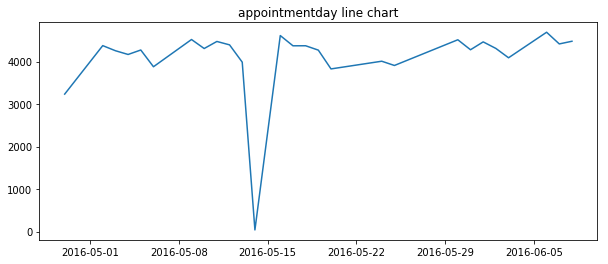

In [25]:
# line chart plot for 'appointmentday'
df.appointmentday.dt.date.value_counts().plot(kind="line",figsize=(10,4));
plt.title('appointmentday line chart')

### we can notice here that patients adherence dropped for a day in the middle of of may 2016.

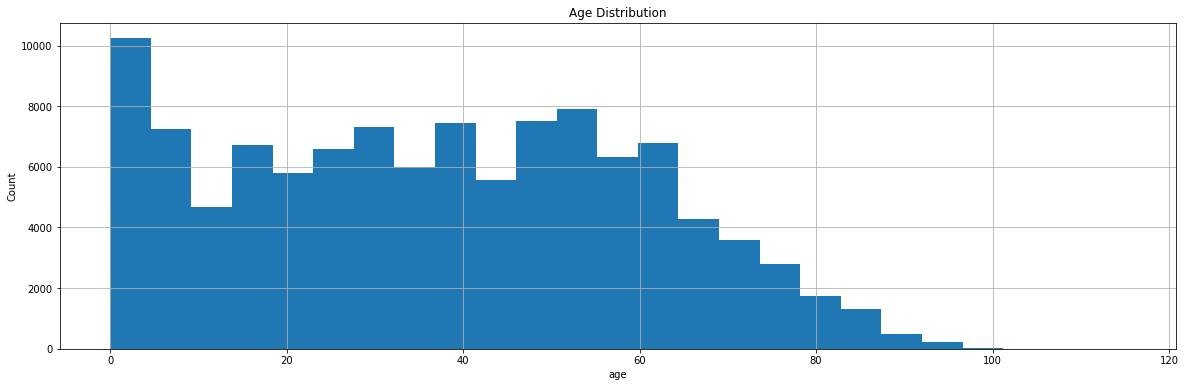

In [26]:
#take a look at age of the patients.
df.age.hist(bins=25,figsize=(20,6)) 
plt.xlabel("age") 
plt.ylabel("Count") 
plt.title("Age Distribution");

### The Age range is contain nearly all ages (from 0 to 115) and the majority is in very young age and between 20 and 55, and the largest among all ages are babies age(0).

In [27]:
#we need to know where our data come from so we will check neighbourhoods.
df.neighbourhood.value_counts()


JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROMÃO                          2214
GURIGICA                       2018
SÃO JOSÉ                       1977
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

### There are 81 brazilian neighbourhood in our dataset.

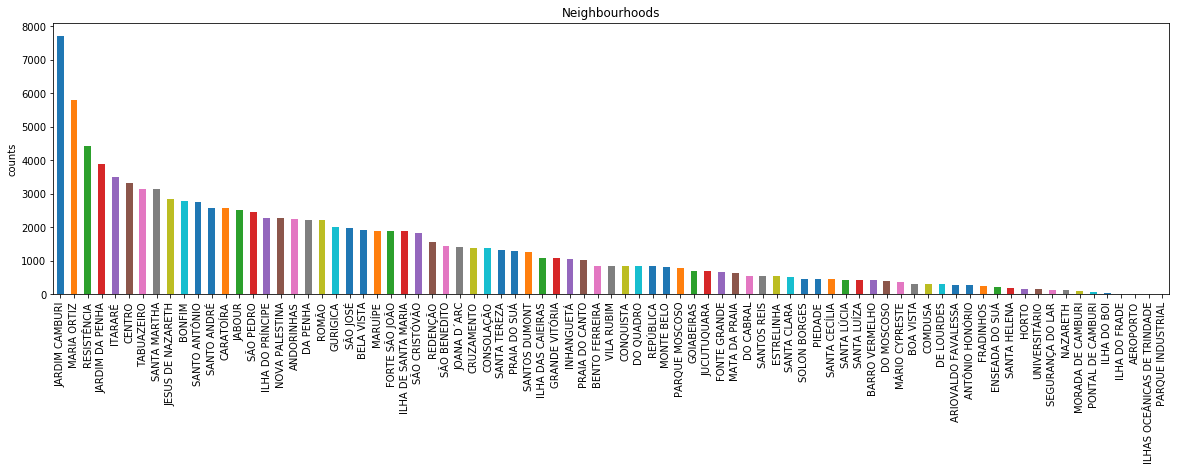

In [28]:
#neighbourhood bar graph
df.neighbourhood.value_counts().plot(kind="bar",figsize=(20,5))
plt.ylabel("counts")
plt.title("Neighbourhoods");


### The neighbourhood 'JARDIM CAMBURI' has the most visits among all the neighbourhoods.

In [29]:
# we will use a function to find the value counts percentage and plot bar graph
def percent_and_barplot(col):
    print(df[col].value_counts(normalize=True))
    df[col].value_counts().plot(kind="bar")
    plt.ylabel("Count")
    plt.title(col);

0    0.901734
1    0.098266
Name: scholarship, dtype: float64


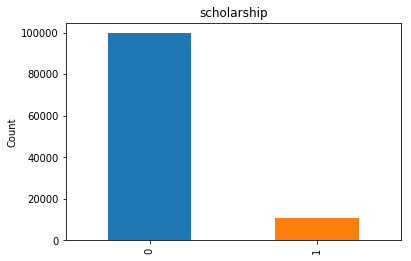

In [30]:
#take a look at scholarships
percent_and_barplot('scholarship')

### Nearly 90% of the patients have No scholarship.

0    0.802752
1    0.197248
Name: hypertension, dtype: float64


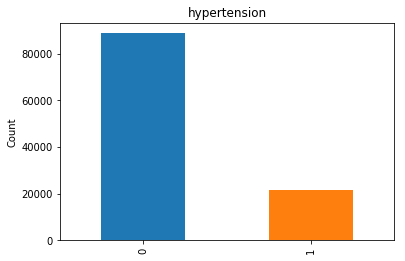

In [31]:
#take a look at hypertension
percent_and_barplot('hypertension')

### 80.27% of the patients do not have hypertension diagnosed.

0    0.928135
1    0.071865
Name: diabetes, dtype: float64


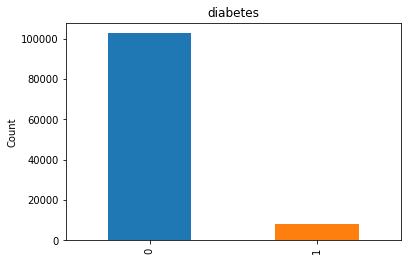

In [32]:
#take a look at diabetes
percent_and_barplot('diabetes')

### Nearly 93% of the patients are not diabetes.


0    0.9696
1    0.0304
Name: alcoholism, dtype: float64


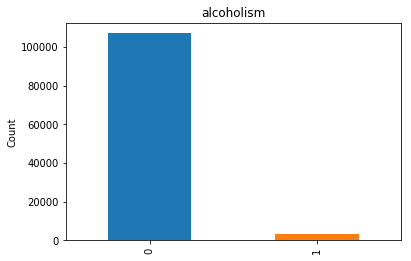

In [33]:
#take a look at alcoholism
percent_and_barplot('alcoholism')

### Nearly 97% of the patients are not alcoholics.

0    0.979724
1    0.018475
2    0.001656
3    0.000118
4    0.000027
Name: handicap, dtype: float64


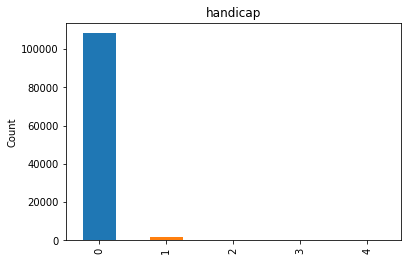

In [34]:
#take a look at handicaps
percent_and_barplot('handicap')

###  Handicap column has more than two values and with some research, we found that it refers to the number of disabilities a person has.

In [35]:
df.handicap.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: handicap, dtype: int64

### We have just 199 patients who had more than one handicap.
#### 183 patients had 2 handicaps,, 13 patients had 3 handicaps and only 3 patients who had 4 handicaps.

In [36]:
df.handicap.value_counts(normalize=True)

0    0.979724
1    0.018475
2    0.001656
3    0.000118
4    0.000027
Name: handicap, dtype: float64

### 98% of the patients have No handicaps.

0    0.678971
1    0.321029
Name: sms_received, dtype: float64


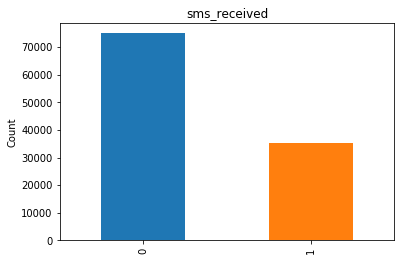

In [37]:
#take a look at sms_received
percent_and_barplot('sms_received')

### Nearly 68% of patients did not received an SMS.

yes    0.798066
no     0.201934
Name: attend, dtype: float64


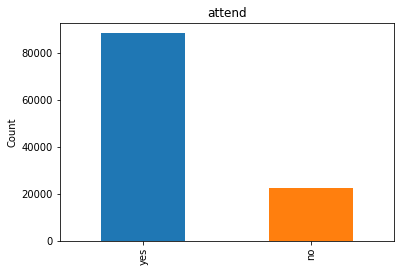

In [38]:
#take a look at attendnce
percent_and_barplot('attend')

## Nearly 80% of the patients showed up to their appointements.

##  Nearly 20% of patient missed their appointment.

## Research Question 1 (Is there a correlation between missing the appointment and the Gender of the patient?)

In [39]:
#first we will make a mask to use in our investigations
come=df['attend']== "yes"
not_come=df['attend']== "no"

In [40]:
#let's create a mask
male = df.query("gender == 'M'")
female = df.query("gender == 'F'")

In [41]:
#caculating the numbers of both gender
df.gender.value_counts()

F    71839
M    38687
Name: gender, dtype: int64

## The number of females is near twice the number of men.

In [42]:
#caculating the percentage of both gender
df.gender.value_counts(normalize=True)

F    0.649974
M    0.350026
Name: gender, dtype: float64

## The percentage of females is 65% and 35% for men.

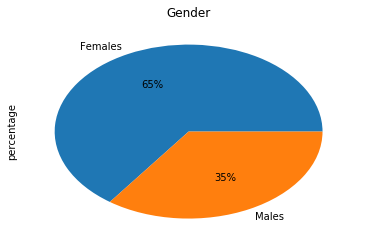

In [43]:
#gender pie chart
df["gender"].value_counts().plot(kind="pie",labels=["Females","Males"],autopct='%1.0f%%')
plt.ylabel("percentage")
plt.title("Gender");

### Here a pie chart shows the percentage.

In [44]:
#calculating males adherence
male.query("attend == 'yes'").shape[0] / male.shape[0]


0.8003205211052808

## Nearly 80% of males showed up to their appointment .

In [45]:
#calculating males absence

male.query("attend == 'no'").shape[0] / male.shape[0]


0.19967947889471915

## Nearly 20% of males didn't show up to their appointment .

In [46]:
female.query("attend=='yes'").shape[0] / female.shape[0]

0.7968512924734475

## Nearly 80% of females showed up to their appointment.

In [47]:
female.query("attend=='no'").shape[0] / female.shape[0]

0.20314870752655242

## Nearly 20% of female didn't show up to their appointment.

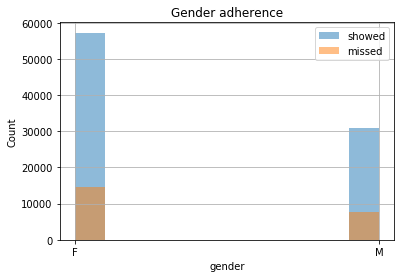

In [48]:
#gender histogram
df[come].gender.hist(alpha=0.5, bins=10,label="showed")
df[not_come].gender.hist(alpha=0.5, bins=10,label="missed")
plt.legend();
plt.title("Gender adherence")
plt.xlabel("gender")
plt.ylabel("Count");

### This histogram shows us the absence and adherance for both men and womens,, we can see that the numbers of females are nearly twice the number of males.and the absence almost have the same general average in both.

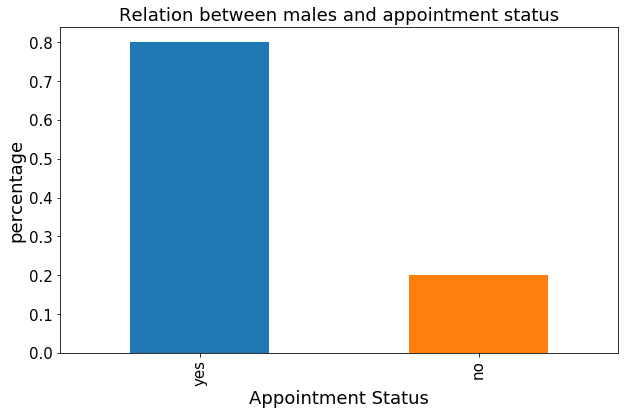

In [49]:
#set figuresize
plt.figure(figsize = (10,6));
#plot a bar graph
(male['attend'].value_counts(normalize = True)).plot(kind = 'bar',fontsize = 15);
#set location and labels
locations = [0,1]
labels = ['yes', 'no']
#set ticklabels and title       
plt.xticks(locations,labels);
plt.xlabel('Appointment Status', fontsize = 18);
plt.ylabel('percentage', fontsize = 18);
plt.title('Relation between males and appointment status', fontsize = 18);

### This bar graph shows us that the vast majority of males showed up to their appointments.

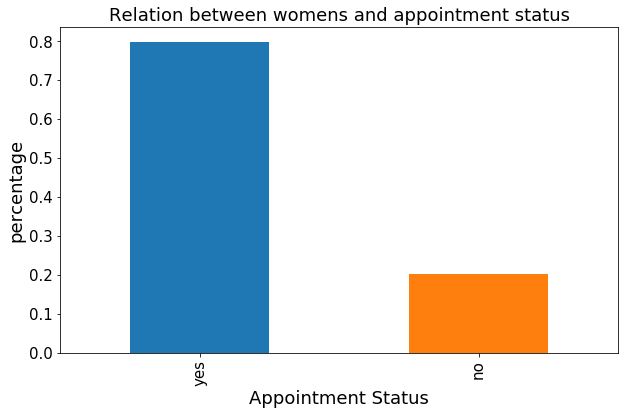

In [50]:
#set figuresize
plt.figure(figsize = (10,6));
#plot a bar graph
(female['attend'].value_counts(normalize = True)).plot(kind = 'bar',fontsize = 15);
#set location and labels
locations = [0,1]
labels = ['yes', 'no']
#set ticklabels and title       
plt.xticks(locations,labels);
plt.xlabel('Appointment Status', fontsize = 18);
plt.ylabel('percentage', fontsize = 18);
plt.title('Relation between womens and appointment status', fontsize = 18);

### This bar graph shows usthat the vast majority of of females showed up to their appointments.

# Results

#### From our data There is no correlation between gender and missing the appointmen.

#### The percentage of male and female patients missing their appointments is the same and same as the general average.

## Research Question 2 (Is there a correlation between missing the appointment and not receiving an SMS message?)

In [51]:
#create a mask
receive=df.query("sms_received == '1'")
not_receive =df.query("sms_received == '0'")

In [52]:
df.sms_received.value_counts(normalize=True)

0    0.678971
1    0.321029
Name: sms_received, dtype: float64

### 68% of the patients didn't receive a sms , and that's a big number.

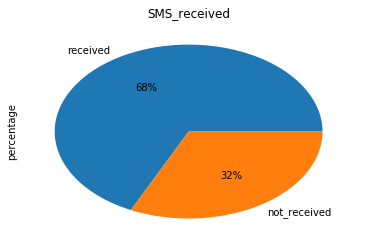

In [53]:
#sms pie chart
df.sms_received.value_counts().plot(kind="pie",labels=['received','not_received'],autopct='%1.0f%%')
plt.ylabel("percentage")
plt.title("SMS_received");

In [54]:
#aluclating the percentage of patients who received an sms and showed up
receive.query("attend == 'yes'").shape[0] / receive.shape[0]

0.7242545516036301

###  72.4% of the patients who received an sms showed up to thier appointements.

In [55]:
#caluclating the percentage of patients who receive an sms and missed their appointments
receive.query("attend == 'no'").shape[0] / receive.shape[0]

0.27574544839637

### 27.6% of the patients who received an sms didn't show up to thier appointements.

In [56]:
#caluclating the percentage of patients who didn't receive an sms and showed up to their appointemnts.
not_receive.query("attend == 'yes'").shape[0] / not_receive.shape[0]

0.8329646607323703

###  83.3% of the patients who  didn't receive an sms showed up to thier appointements .

In [57]:
#caluclating the percentage of patients who didn't receive an sms and missed their appointments
not_receive.query("attend == 'no'").shape[0] / not_receive.shape[0]

0.16703533926762965

### 16.7% of the patients who didn't receive an sms didn't show to thier appointements .

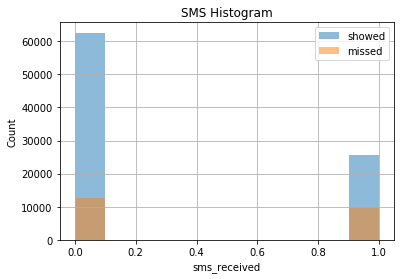

In [58]:
df[come].sms_received.hist(alpha=0.5, bins=10,label="showed")
df[not_come].sms_received.hist(alpha=0.5, bins=10,label="missed")
plt.legend();
plt.title("SMS Histogram")
plt.xlabel("sms_received")
plt.ylabel("Count");

### Histogram shows the adherence and absence between patients who received an sms and who didn't.

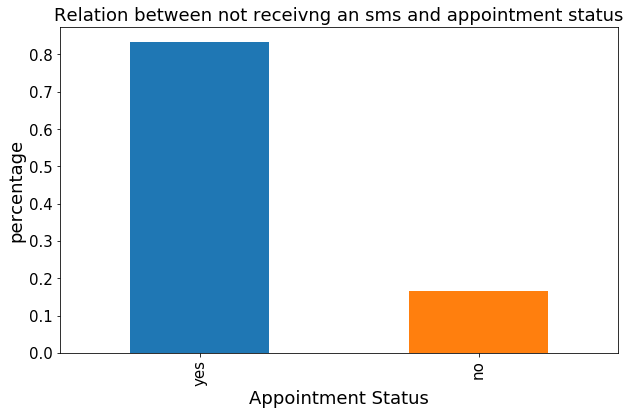

In [59]:
#set figuresize
plt.figure(figsize = (10,6));
#plot a bar graph
(not_receive['attend'].value_counts(normalize = True)).plot(kind = 'bar',fontsize = 15);
#set location and labels
locations = [0,1]
labels = ['yes', 'no']
#set ticklabels and title       
plt.xticks(locations,labels);
plt.xlabel('Appointment Status', fontsize = 18);
plt.ylabel('percentage', fontsize = 18);
plt.title('Relation between not receivng an sms and appointment status', fontsize = 18);

### This bar graph shows us the vast majority of patients who didn't receive an sms showed up to their appointments.

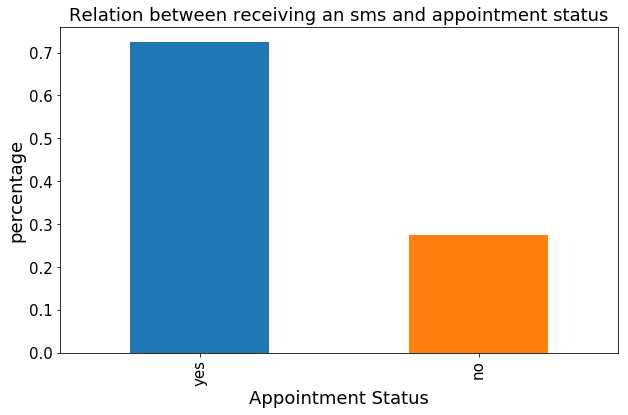

In [60]:
#set figuresize
plt.figure(figsize = (10,6));
#plot a bar graph
(receive['attend'].value_counts(normalize = True)).plot(kind = 'bar',fontsize = 15);
#set location and labels
locations = [0,1]
labels = ['yes', 'no']
#set ticklabels and title       
plt.xticks(locations,labels);
plt.xlabel('Appointment Status', fontsize = 18);
plt.ylabel('percentage', fontsize = 18);
plt.title('Relation between receiving an sms and appointment status', fontsize = 18);

####  

### ### This bar graph shows us that the vast majority of patients who received an sms showed up to their appointment.

# Results
### The majority didn't received an SMS.
### The patients who received an SMS have a higher percentage of missing the appointments 27.6% to those who didn't 16.7%. 
### the patients who didn't receive an sms have a higher percentage of showing up 83.3% to those who did 72.4%.
### From our data Receiving an SMS didn't make patients more likely to show to their appointments.

## Research Question 3( Is there any relation between missing the appointment and diseases?)


### diseases in our dataset are : Hypertension , Diabetes and Alcoholism. so we will disscuss them.

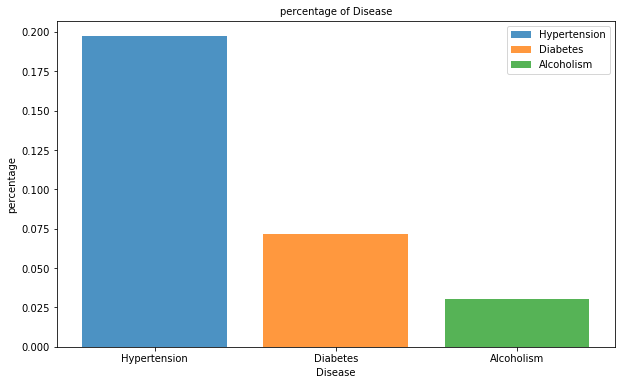

In [64]:
#comparison between diseases
#set figuresize
plt.figure(figsize = (10,6));
#set bar location and Height
plt.bar(1,df['hypertension'].mean(),alpha=0.8,label = 'Hypertension');
plt.bar(2,df['diabetes'].mean(),alpha=0.8,label = 'Diabetes');
plt.bar(3,df['alcoholism'].mean(),alpha=0.8,label = 'Alcoholism');
location = [1,2,3]
label = ['Hypertension','Diabetes','Alcoholism']
location = [1,2,3]
#set ticklabels and title
plt.xticks(location,label);
plt.xlabel('Disease',fontsize = 10);
plt.ylabel('percentage', fontsize = 10);
plt.title('percentage of Disease',fontsize = 10);
plt.legend();

### Hypertension is most common disease in our dataset.

In [61]:
# create a mask
df_hyper=df.query("hypertension== '1'")

In [62]:
# create a mask
df_diabetes=df.query("diabetes== '1'")

In [63]:
# create a mask
df_alcohol= df.query("alcoholism== '1'")

In [65]:
#calculating hypertension patients adherence
df_hyper.query("attend == 'yes'").shape[0] / df_hyper.shape[0]

0.8269804137424889

## From our data 82% of hypertension patients showed to their appointments.

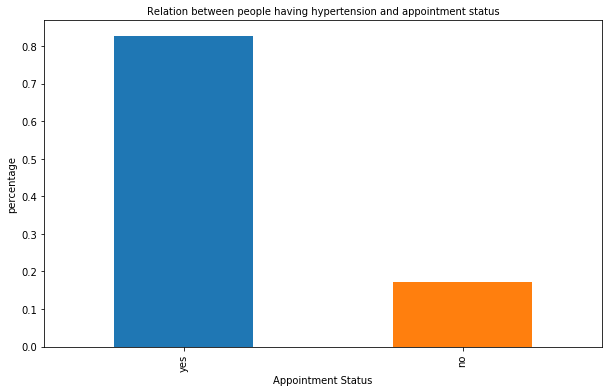

In [66]:
#set figuresize
plt.figure(figsize = (10,6));
#plot a bar graph
(df_hyper['attend'].value_counts(normalize = True)).plot(kind = 'bar',fontsize = 10);
#set location and labels
locations = [0,1]
labels = ['yes', 'no']
#set ticklabels and title       
plt.xticks(locations,labels);
plt.xlabel('Appointment Status', fontsize = 10);
plt.ylabel('percentage', fontsize = 10);
plt.title('Relation between people having hypertension and appointment status', fontsize = 10);

### As we see the vast majority of hypertension patients showed to their appointments.

In [67]:
#calculating Diabetics adherence

df_diabetes.query("attend == 'yes'").shape[0] / df_diabetes.shape[0]

0.8199672667757774

## Nearly 82% of diabetics showed up to their appointments.

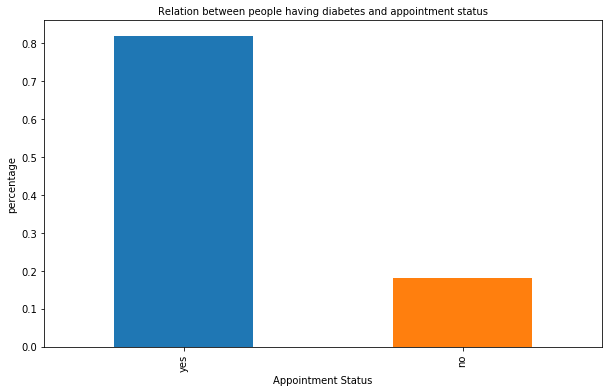

In [68]:
#set figuresize
plt.figure(figsize = (10,6));
#plot a bar graph
(df_diabetes['attend'].value_counts(normalize = True)).plot(kind = 'bar',fontsize = 10);
#set location and labels
locations = [0,1]
labels = ['yes', 'no']
#set ticklabels and title       
plt.xticks(locations,labels);
plt.xlabel('Appointment Status', fontsize = 10);
plt.ylabel('percentage', fontsize = 10);
plt.title('Relation between people having diabetes and appointment status', fontsize = 10);

## As we see the vast majority of Diabetics showed up to their appointments.

In [69]:
#calculating Alcoholics adherence
df_alcohol.query("attend == 'yes'").shape[0] / df_alcohol.shape[0]

0.7985119047619048

## From our data Nearly 80% of alcoholics showed up to their appointments.

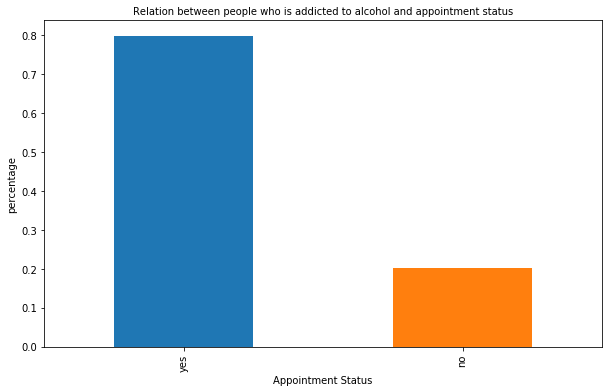

In [70]:
#set figuresize
plt.figure(figsize = (10,6));
#plot a bar graph
(df_alcohol['attend'].value_counts(normalize = True)).plot(kind = 'bar',fontsize = 10);
#set location and labels
locations = [0,1]
labels = ['yes', 'no']
#set ticklabels and title       
plt.xticks(locations,labels);
plt.xlabel('Appointment Status', fontsize = 10);
plt.ylabel('percentage', fontsize = 10);
plt.title('Relation between people who is addicted to alcohol and appointment status', fontsize = 10);

## As we see the vast majority of alcoholics showed up to their appointments.

## Results
### The most common disease in our dataset is hypertension.
### From our data there is no correlation between diseases and missing the appoimtments.
### Adherence rates were not affected by any disease and are almost close.
### The absence rate is almost the same in every disease, regardless of the number of patients with it

<a id='conclusions'></a>
## Conclusions

### We investigated the correlation between some of the characteristics of the patients and whether they missed or showed to their appointment. And these are the results of these analyses:

### -There is no correlation between gender alone and missing the appointment.
### -There is no correlation between diseases and missing the appointment.
### -Receiving an SMS did not increase the chance that the patient would show to their appointment.


## Limitations

### -The dataset didn't mention the reason why the patient scheduled an appointment, which may give an additional explanation about why they miss their appointments.
### -Missing features which may have been useful to this analysis like if the patient in the past has been a no-show, or whether the patient is employed or unemployed.
### The dataset contains only 3 month information from 2016,if the data was based on various wide conclusions drawn might have been different.



### References:
### stackoverflow.com
### Discussing with friends


In [71]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255